In [11]:
#Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import email
from datetime import datetime
import os.path
from os import path
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
#Reading the email-data into a dataframe
emails = pd.read_csv('emails.csv')

In [3]:
#Checking the contents of the data
emails.head()

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [4]:
#Extracting data from email message to its respective columns
messages = list(map(email.message_from_string,emails.message))
fields = messages[0].keys()
for field in fields:
    emails[field] = [message[field] for message in messages]
emails['body'] = [message.get_payload() for message in messages]

In [5]:
#Column names and data pre-processing
columns_to_drop = ['message','Mime-Version','Content-Type','Content-Transfer-Encoding','X-cc','X-bcc','X-Folder','X-Origin','X-FileName','From','X-To']
emails.drop(columns=columns_to_drop,axis=1,inplace=True)
emails = emails.rename(columns={'X-From':'from'})
emails.columns = map(str.lower,emails.columns)
to_name = emails['to'].str.split('@',expand = True)
emails['to_name'] = to_name[0].str.replace('.',',')

In [6]:
#Final dataframe of the email messages with contents in its respective columns
emails.head()

,file,message-id,date,to,subject,from,body,to_name
0,allen-p/_sent_mail/1.,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",tim.belden@enron.com,,Phillip K Allen,Here is our forecast\n\n,"tim,belden"
1,allen-p/_sent_mail/10.,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",john.lavorato@enron.com,Re:,Phillip K Allen,Traveling to have a business meeting takes the...,"john,lavorato"
2,allen-p/_sent_mail/100.,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",leah.arsdall@enron.com,Re: test,Phillip K Allen,test successful. way to go!!!,"leah,arsdall"
3,allen-p/_sent_mail/1000.,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",randall.gay@enron.com,,Phillip K Allen,"Randy,\n\n Can you send me a schedule of the s...","randall,gay"
4,allen-p/_sent_mail/1001.,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",greg.piper@enron.com,Re: Hello,Phillip K Allen,Let's shoot for Tuesday at 11:45.,"greg,piper"


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

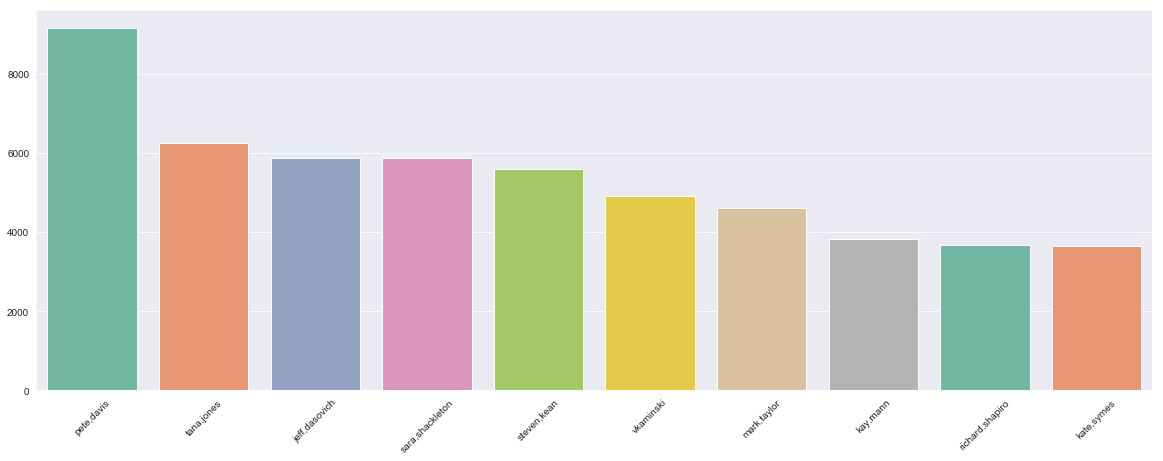

In [7]:
#Plot of top 10 people in the company who have recieved emails based on the count of emails recieved
plt.figure(figsize=(20,7))
email_recieved_plot = sns.barplot(data=emails,x=emails.to_name.value_counts()[0:10].index,y=emails.to_name.value_counts()[0:10].values,palette='Set2')
plt.xticks(rotation=45)

As we can see, the employee with the highest emails recieved was pete,davis but that looks like a lot of emails compared to the other's. 
When i went ahead and checked the contents of the emails that were recieved by him, I saw that most of them were auto generated emails regarding some warning.
So figuring out that this does'nt help much for the problem at hand, I considered the next employee who recieved the most emails. i.e Tana, Jones.
The emails recieved by Tana were sent by actual users, we will be analyzing that in the next steps.

In [8]:
#Filter the emails based on one person who recieved the most email, this will form our corpus
emails_filtered = emails[emails.to_name == 'tana,jones'].reset_index(drop=True)
emails_filtered.date = pd.to_datetime(emails_filtered.date)
emails_filtered = emails_filtered.sort_values(by='date',axis=0,ascending=False).reset_index(drop=True)
from_name = emails_filtered['from'].str.split('<',expand = True)
emails_filtered['from_name'] = from_name[0]

exchangeinfo@nymex.com                   484
Leslie Hansen                            478
Sara Shackleton                          256
Mark Taylor                              224
Marcus Nettelton                         150
ARSystem <ARSystem@mailman.enron.com>    140
Carol St Clair                           138
Shari Stack                              117
Mark Greenberg                           100
David Minns                               96
Name: from, dtype: int64


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

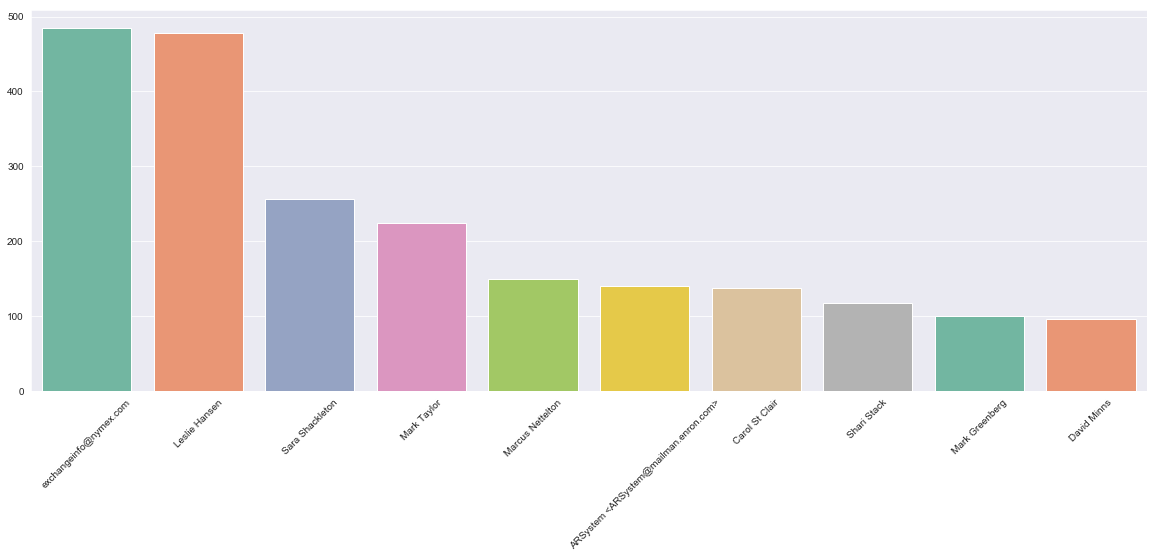

In [9]:
#Analyszing the emails that Tana recieved.
print(emails_filtered['from'].value_counts()[0:10])
plt.figure(figsize=(20,7))
email_recieved_from_plot = sns.barplot(data=emails_filtered,x=emails_filtered['from'].value_counts()[0:10].index,y=emails_filtered['from'].value_counts()[0:10].values,palette='Set2')
plt.xticks(rotation=45)

In [15]:
if not path.exists('emails_filtered.csv'):
    emails_filtered.to_csv('emails_filtered.csv',sep=',')
pass

As we can see from the above plot, Tana has recieved a lot of emails from exchangeinfo@nymex.com and Leslie Hansen. 
<br/>
<br/>Looks like
1. exchangeinfo@nymex.com is an external partner(By seeing the email domain) whom Tana handles.
2. Leslie Hansen can be Tana's supervisor (Just an assumption).
<br/>Not only the top two, we will consider the top 5 people who send emails to Tana.
3. Sara Shackleton
4. Mark Taylor
5. Marcus Nettelton
<br/>We will be considering these are top people Tana's will have conversations on a regular basis. So these people will form our query to the corpus and we will rank Tana's emails based on the priority that will be assigned to each individual from the above 5 and the email that they will be sending.

As a checkpoint, i have extracted out the data that will form the corpus of the document. Going on further, this data can be used for processing of the data